In [5]:
# 주피터 노트북을 쓸때 맨 마지막 변수값만 출력되서 print 문을 쓰곤하는데 아래 import와 설정을 해주면 모든 변수값을 출력한다.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

li1 = [1,2,3,4,5]
li2 = [6,7,8,9,0]
li1
li2

[1, 2, 3, 4, 5]

[6, 7, 8, 9, 0]

In [13]:
# 코루틴
import time
def message_time():
    while True:        # 코루틴을 계속 유지하기 위해 무한 루프 사용
        x = (yield)    # 코루틴 바깥에서 값을 받아옴, yield를 괄호로 묶어야 함
        print(x, f'\n<{time.asctime()}>')
 
msg = message_time()
#next(msg)           # yield까지 실행해서 대기상태로 만듦
msg.send(None) # 내부적으로 next와 같은 효과를 냄

msg.send('hello~ nice meet you^^ ')   # 값을 보내고 다음 대기상태까지 진행

hello~ nice meet you^^  
<Mon Aug  5 07:14:53 2024>


In [20]:
import time
def message_time():
    count = 0   # 살짝 클로저 냄새가 나는군~ ㅋㅋ
    while True:        # 코루틴을 계속 유지하기 위해 무한 루프 사용
        count += 1
        x = (yield count)    # 코루틴 바깥에서 값을 받아옴, yield를 괄호로 묶어야 함
                            # yield 뒤에 값을 넣어주면 반환을 함
        print(x, f'\n<{time.asctime()}>')
 
msg = message_time()
#next(msg)           # yield까지 실행해서 대기상태로 만듦
print(msg.send(None)) # 내부적으로 next와 같은 효과를 냄

msg.send('hello~ nice meet you^^ ')   # 값을 보내고 다음 대기상태까지 진행
print(msg.send('see you again')) 

msg.close()
print('프로그램 종료')


1
hello~ nice meet you^^  
<Mon Aug  5 07:32:37 2024>
see you again 
<Mon Aug  5 07:32:37 2024>
3
프로그램 종료


In [19]:
import time
def message_time():
    try:
        count = 0   # 살짝 클로저 냄새가 나는군~ ㅋㅋ
        while True:        # 코루틴을 계속 유지하기 위해 무한 루프 사용
            count += 1
            x = (yield count)    # 코루틴 바깥에서 값을 받아옴, yield를 괄호로 묶어야 함
                                # yield 뒤에 값을 넣어주면 반환을 함
            print(x, f'\n<{time.asctime()}>')
    except GeneratorExit as e :     # close() 할때 발생하는 예외인데
        print(e, type(e).__name__)  # 굳이 안잡아도 됨. 에러를 발생시키지 않음. 
        print(x, count)             # 예외에도 등급이 있나??
 
msg = message_time()
#next(msg)           # yield까지 실행해서 대기상태로 만듦
print(msg.send(None)) # 내부적으로 next와 같은 효과를 냄

msg.send('hello~ nice meet you^^ ')   # 값을 보내고 다음 대기상태까지 진행
print(msg.send('see you again')) 

msg.close() # 코루틴 종료
print('프로그램 종료')

1
hello~ nice meet you^^  
<Mon Aug  5 07:32:11 2024>
see you again 
<Mon Aug  5 07:32:11 2024>
3
 GeneratorExit
see you again 3
프로그램 종료


In [ ]:
# 가상 환경
# 해당 버전의 파이썬을 설치한다. (3버전 이상에서 지원한다)
# 관리자권한으로 터미널을 실행한다
# 설치 위치로 이동해서 python -m venv <가상환경이름>
# 설치 위치에 <가상환경이름> 으로 된 폴더가 새로 생긴다.(가상환경)
# ./<가상환경이름>/Scripts>activate 실행하면 가상환경 모드가 실행 된다
# deactivate 는 가상환경 모드를 종료한다


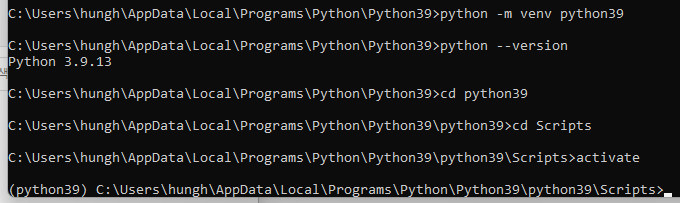

In [7]:
# 참조한 횟수 알아보기. 0이면 가비지~
import sys
a = [1,2,3,4,5]
sys.getrefcount(a)
b = a
sys.getrefcount(a)


2

3

In [17]:
# 문자열 포맷팅 
'%d %s %f' % (1, 'a', 1) # 뭐야 형변환도 안되고 ㅜㅜ 버려~!!

'1 a 1.000000'

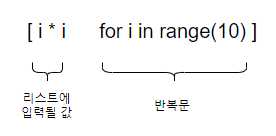

In [24]:
# 리스트 컴프리헨션
[ i for i in range(1, 11) if i % 2 == 0]
[ i if i % 2 == 0 else i + 1 for i in range(1, 11)]

[2, 4, 6, 8, 10]

[2, 2, 4, 4, 6, 6, 8, 8, 10, 10]

In [25]:
# 튜플 언패킹
def hap(num1, num2, num3, num4):
    return num1+num2+num3+num4

scores = (1, 2, 3, 4)
result = hap(*scores)            # 함수 호출 시 튜플 언패킹
print(result)


10


In [33]:
# zip 
name = ['merona', 'gugucon']
price = [500, 1000]

icecream = dict(zip(name, price))
print(icecream)
dic1 = {k: v for k, v in zip(range(1, 11), ['a','b','c','d','e','f','g','h','i','j'])}
dic1


{'merona': 500, 'gugucon': 1000}


{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j'}

In [ ]:
class Func:
    def __call__(self):  # 자동 호출 메서드
        print("호출 됨")

f = Func() # __init__() 발동
f() # __call__() 발동


In [36]:
# 키워드 가변인자 
def foo(**kwargs):  # 인자를 값만 받는게 아니라 변수 이름도 같이 받는다. 
    print(kwargs, type(kwargs))   # 고로 타입은 dict 가 된다
    
foo(a=1, b=2, hello=3)


{'a': 1, 'b': 2, 'hello': 3} <class 'dict'>


In [37]:
def foo(*args, **kwargs): # 변수명이 없이 넘어오는것은 가변인자로 이름 붙은것은 키워드인자로
    print(args)
    print(kwargs)

foo(1, 2, 3, a=1, b=1, c=2)

(1, 2, 3)
{'a': 1, 'b': 1, 'c': 2}


In [38]:
# 람다. 대개 한줄짜리 리턴함수대신 쓴다
a = lambda x : 5 * x
a(5)

25

In [39]:
# 함수안에 함수. 클로저 closure
def outer(num): # 외부함수의 num을 내부함수에서 붙들고 있다. 
    def inner():
        print(num)
    return inner

f1 = outer(1)
f2 = outer(2)
f1()
f2()

1
2


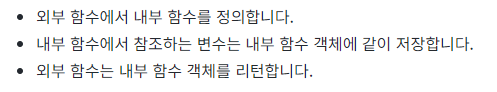

In [40]:
# 클래스로 클로저 구현
class Outer:
    def __init__(self, num):
        self.num = num
    def __call__(self):
        print(self.num)
f1 = Outer(3)
f1() # __call__을 구현하면 인스턴스를 함수처럼 사용가능하다

3


In [41]:
# 추상클래스
from abc import *
class Car(metaclass=ABCMeta):
    @abstractmethod
    def drive(self): # 상속시 구현하지 않으면 에러
        pass

class K5(Car):
    def drive(self):
        print("k5 drive")

k5 = K5()

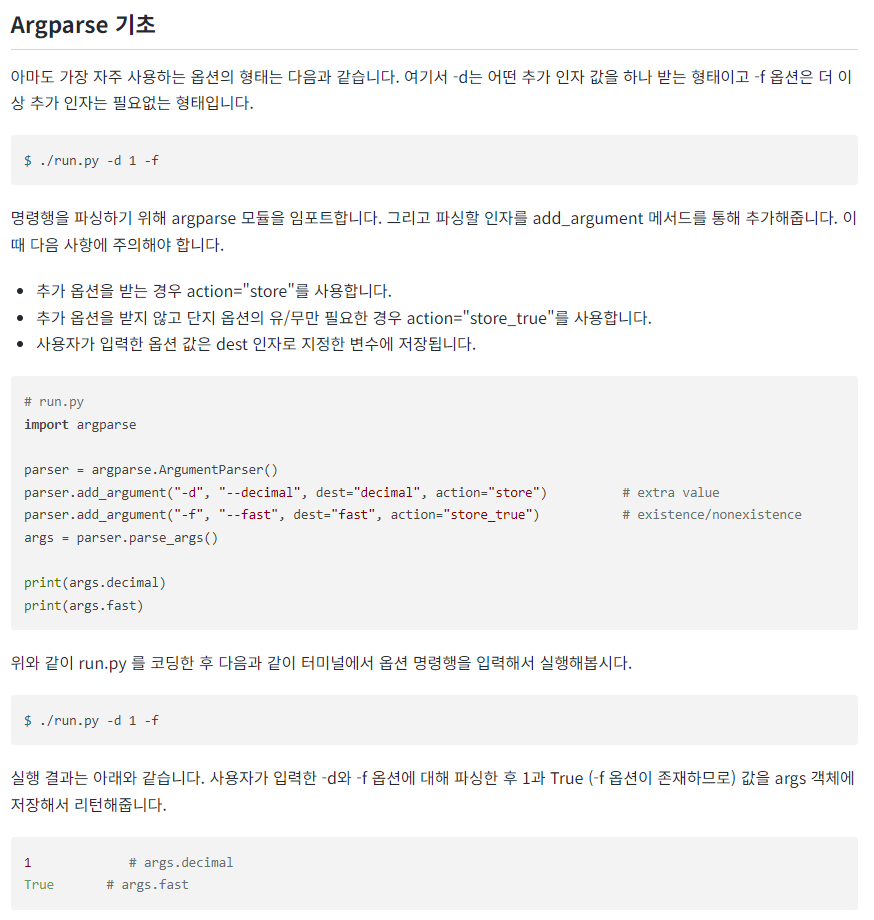

In [ ]:
# 패키지 만들기, pypi

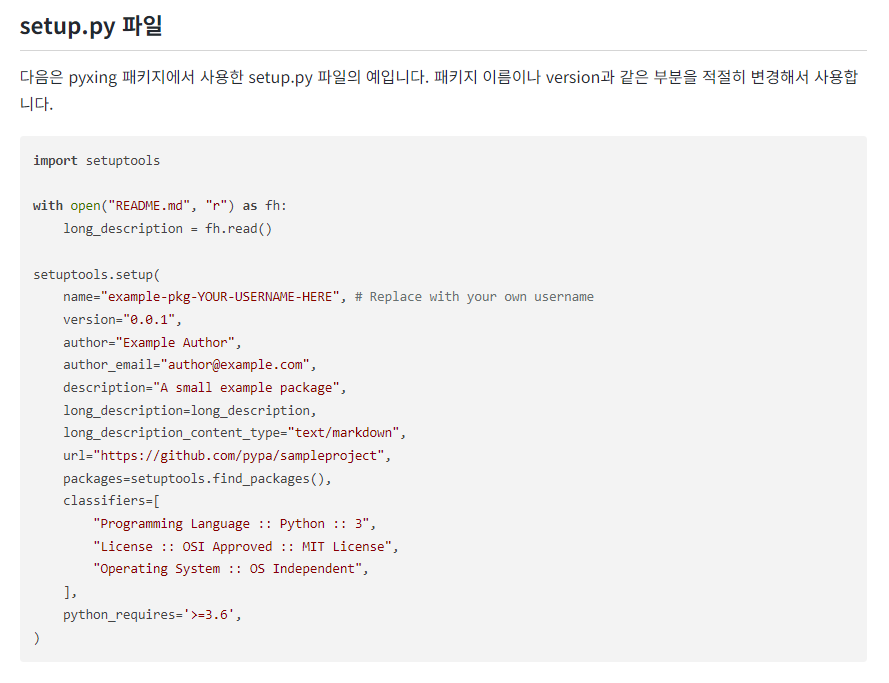

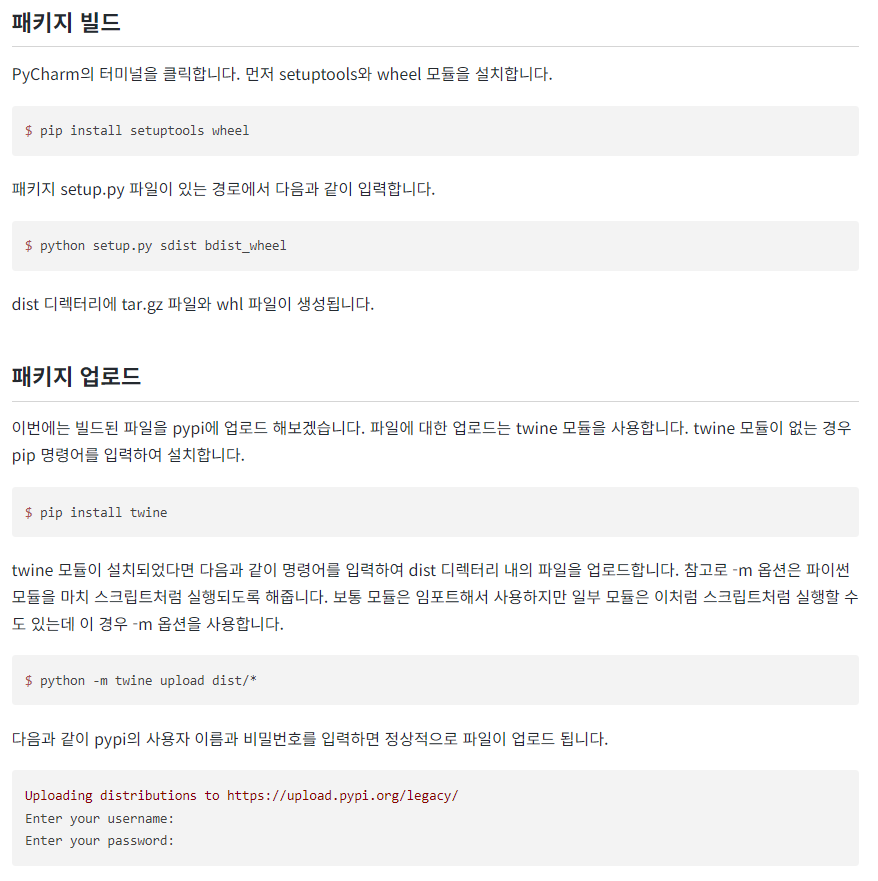

In [ ]:
# 이터러블 iteralbe 이터레이터 : 반복가능한~ 
class MyIterator:
    def __next__(self):
        return 1

class MyIterable:
    def __iter__(self):
        obj = MyIterator()
        return obj

m = MyIterable()
r = iter(m)
print(next(r))
print(next(r))
print(next(r))


In [45]:
# 제너레이터 : 프로그레스 progress 와 비슷한가?? 
# return 대신 yield 로 반환한다. 
# 대게 반복문을 포함한다.
import time
def progress(count) :
    for i in range(count) :
        print('for : ', i)
        time.sleep(1)
        if(i == 5): # 5에서 뛰쳐나갔다. 고로 5를 리턴하지 않는다.
            break
        yield i
        
    
g = progress(10)
for i in g :  # for 를 돌리면 자동으로 next()를 실행한다
    print('g : ',i)

for :  0
g :  0
for :  1
g :  1
for :  2
g :  2
for :  3
g :  3
for :  4
g :  4
for :  5


In [48]:
# @데코레이터 : 추가 함수. 겉함수 . 데코레이터 함수를 만들어놓고 붙이고 싶은 함수 위에 @데코레이터를 붙이면 된다
# 예외 잡는거 뒤집어 씌울때 유용할것같다.
def deco(fn) :
    def deco_inner():
        print('*' * 10)
        fn()
        print('*' * 10)
    return deco_inner

def hello():
    print('hello')

deco_hello = deco(hello)
deco_hello()
print()
hello()
print()

@deco
def hello2():
    print('hello2')

hello2()


**********
hello
**********

hello

**********
hello2
**********


In [63]:
# 로깅 logging
import logging
import time
#logging.basicConfig(level=logging.INFO) # debug가 젤낮은거넹~ ㅎ
logging.basicConfig(level=logging.DEBUG) # debug가 젤낮은거넹~ ㅎ
# logging.basicConfig(filename=f'log{time.time()}.txt', level=logging.INFO)
logging.info(f'log_{time.localtime().tm_year}_{time.localtime().tm_mon}_{time.localtime().tm_mday}.txt')

logging.debug('debug')
print(logging.DEBUG, logging.INFO, logging.WARNING)

INFO:root:log_2024_7_22.txt


10 20 30


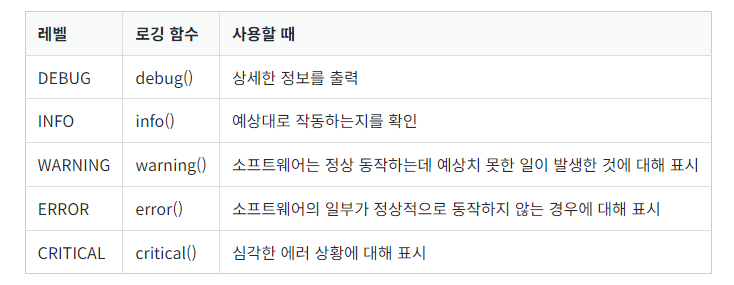

In [66]:
# win32 모듈
import win32gui

def window_enumeration_handler(hwnd, top_windows):
    top_windows.append((hwnd, win32gui.GetWindowText(hwnd)))

top_windows = []
win32gui.EnumWindows(window_enumeration_handler, top_windows)
print('top_windows : ', len(top_windows))
for hwnd, title in top_windows:
    print(hwnd, title)


top_windows :  246
65912 
65854 
65780 
65776 
65770 
65766 
65746 
65738 
65734 
65686 
65674 
65670 
65800 
65794 
65790 
65664 
65792 
65748 
65802 
66206 배터리 수준
66310 
66350 Network Flyout
66348 
198316 파이썬중급.ipynb - exercise - Visual Studio Code
262780 01) EnumWindows - 레벨업 파이썬 - Whale
525778 
393820 한글 GitHub 페이지 확인 - Whale
787140 
198148 
132602 02.수와 연산(1), 혼합계산2 - YouTube - Brave
132500 
395084 
132504 
132478 
132522 
3540542 
788186 
198328 
722584 
524470 
1443380 
656918 
65838 
656984 DDE Server Window
460406 OfficePowerManagerWindow
132752 
852712 
132598 
329194 
1114838 
460260 
263800 
67330 
2426506 Google Chat - 조영훈 (sixtick) - Chat
263772 
65818 
67012 Window
393768 Mode Indicator
590434 
131646 
525048 
262738 
393918 
197210 
262834 
65990 Sticky Notes
262816 Microsoft Text Input Application
131880 계산기
197528 계산기
197362 
196684 설정
131408 설정
67000 SystemResourceNotifyWindow
132524 MediaContextNotificationWindow
66994 
66984 
263588 GDI+ Window (OneDrive.exe)
66886

In [ ]:
# 멀티프로세싱 

In [ ]:
# 정규표현식

In [ ]:
# 문서화